In [1]:
import model as md
import random
import numpy as np
import matplotlib.pyplot as plt


#Model Parameters
token_cat = ['common', 'premium', 'rare'] #descending to ascending value order must be maintained
category_weights = {token_cat[0]:0.90, token_cat[1]:0.09, token_cat[2]:0.01}
starting_breed_cost = 0.5
customer_num = 10000
token_num = 1600
dist_params = [0,1]
est_mating_cutoff = 20 # breed cost multiplier after which customers stop using the token
breeding_choice_type = 0
transfer_details = [1, round(0.1*customer_num)] # type of token transfer between customers at each step, number of customers transferring at each step
mates_per_step = 0.25 # percent of customers mating per step
distribution_option = 1 # how to select mating pairs each step

#Simulation Parameters
# 1 step = 1 week
# Customers are selected to mate based on a log normal distribution per week
# partners are selected from the same list & after mating partners are removed from the list


# Add variable for % of people breeding at a time
# if it's rare, breed it less often , and possibly use the new rare token if there is one
# Create a claim rate for each category - i.e. people who claim/don't claim tokens in each type

3.6232934227501246
5000


(array([  1.,   0.,   0.,   3.,   8.,   7.,  17.,  33.,  52.,  80.,  95.,
         93., 136., 158., 178., 187., 222., 233., 217., 237., 250., 235.,
        230., 225., 212., 209., 180., 176., 143., 142., 126., 120., 114.,
         99.,  74.,  62.,  65.,  48.,  53.,  42.,  36.,  29.,  35.,  28.,
         15.,  16.,  14.,  10.,  11.,   8.,   5.,   8.,   5.,   3.,   2.,
          5.,   0.,   2.,   2.,   0.,   0.,   0.,   0.,   2.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 1060. ,  1149.4,  1238.8,  1328.2,  1417.6,  1507. ,  1596.4,
         1685.8,  1775.2,  1864.6,  1954. ,  2043.4,  2132.8,  2222.2,
         2311.6,  2401. ,  2490.4,  2579.8,  2669.2,  2758.6,  2848. ,
         2937.4,  3026.8,  3116.2,  3205.6,  3295. ,  3384.4,  3473.8,
         3563.2,  3652.6,  3742. ,

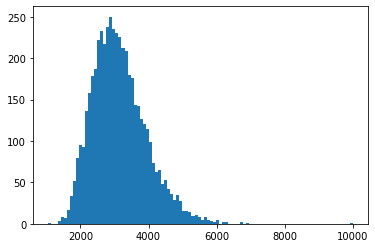

In [2]:
y = np.random.lognormal(0.1,0.25,round(0.5*customer_num))
print(max(y))
print(len(y))
adjusted_y = y/max(y)*customer_num
plt.hist(np.round(adjusted_y),100)

In [3]:
simulation = md.ZebraNFTModel(customer_num,
                              token_num, dist_params, 
                              token_cat, category_weights, 
                              est_mating_cutoff, 
                              breeding_choice_type, 
                              transfer_details,
                              mates_per_step,
                              distribution_option)
token_count = []
number_of_tokens = 0
for category in token_cat:
    print('Category '+ category)
    number_of_tokens = 0
    for token in simulation.zeb_token_list:
        if token.category == category:
            number_of_tokens +=1
    print("number of tokensin category " +category+"="+ str(number_of_tokens))
    token_count.append(number_of_tokens)

Category common
number of tokensin category common=1440
Category premium
number of tokensin category premium=144
Category rare
number of tokensin category rare=16


In [4]:
token_counts = {}
for category in token_cat:
    token_counts[category] = []

decision_count = {}
decisions = [1, 2, 3, 4]
for decision in decisions:
    decision_count[decision] = []

for i in range(52*3):
    simulation.step()
    token_count = []
    number_of_tokens = 0
    for category in token_cat:
        #print('Category '+ category)
        number_of_tokens = 0
        for token in simulation.zeb_token_list:
            if token.category == category:
                number_of_tokens +=1
        #print("number of tokensin category " +category+"="+ str(number_of_tokens))
        token_counts[category].append(number_of_tokens)
    
    for decision in decisions:
        #print('Category '+ category)
        count = 0
        for token in simulation.zeb_token_list:
            if token.decision == decision:
                count +=1
        #print("number of tokensin category " +category+"="+ str(number_of_tokens))
        decision_count[decision].append(count)
    

ValueError: min() arg is an empty sequence

In [5]:
len(simulation.zeb_token_list)

8708

In [6]:
token_count = []
number_of_tokens = 0
for category in token_cat:
    print('Category '+ category)
    number_of_tokens = 0
    for token in simulation.zeb_token_list:
        if token.category == category:
            number_of_tokens +=1
    print("number of tokensin category " +category+"="+ str(number_of_tokens))
    token_count.append(number_of_tokens)
    

Category common
number of tokensin category common=7676
Category premium
number of tokensin category premium=984
Category rare
number of tokensin category rare=48


In [7]:
print(token_counts['common'])

[2711, 4785, 7493]


In [8]:
print(token_counts['premium'])

[331, 594, 963]


In [9]:
print(token_counts['rare'])

[29, 38, 47]


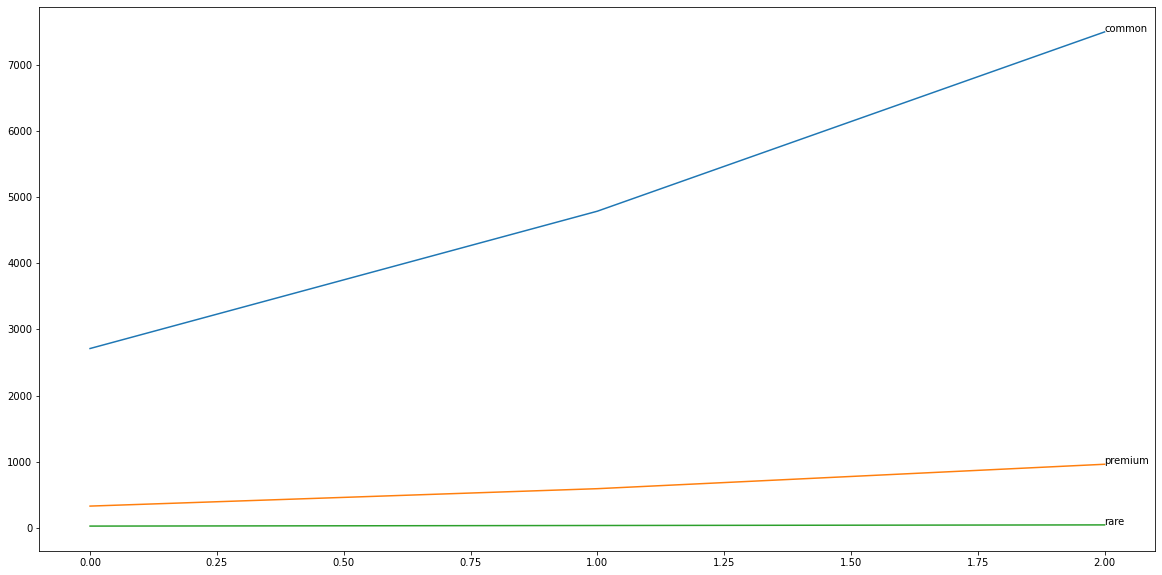

In [10]:
# number of tokens of each type over time

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
for category in token_cat:
    plt.plot(range(len(token_counts[category])),token_counts[category])
    plt.text(range(len(token_counts[category]))[-1], token_counts[category][-1], category)


In [ ]:
# Rate of mating category decision

plt.figure(figsize=(20,10))
for decision in decisions:
    plt.plot(range(len(decision_count[decision])),decision_count[decision])
    plt.text(range(len(decision_count[decision]))[-1], decision_count[decision][-1], decision)

